In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib 

twopi = 2.0*np.pi
nmassless = 1000
lambda_crit = 1007.0 # in pc

In [2]:
# return the standard deviation of xg for a set of outputs for massless particles
wait_i = 4 # shift this if you wait longer before starting
diff_i = 11
def getstds(root):  # root="../save_a1/ss0008.txt"
    fname=root+'0' + str(wait_i) + '.txt'  
    stdarr=[]
    tarr = []
    for i in range(wait_i,wait_i+diff_i,1):
        if (i>=10):
            fname=root+str(i)+'.txt'
        else:
            fname=root+'0'+str(i)+'.txt'
        t = (i-wait_i)*0.5
        #print(fname,t)
        jj = np.loadtxt(fname,skiprows=9)  # can specify only a single column if you want
        # jj = np.loadtxt(fname,skiprows=9, usecols=10)
        xgarr = jj[0:nmassless,10]  #massless!, x guiding center
        sig = np.std(xgarr)
        if (i==wait_i): sig=0
        stdarr = np.append(stdarr,sig)
        tarr = np.append(tarr,t)
    return stdarr,tarr

# return the maximum xg for a set of outputs for massless particles

def getmax_xg(root):  # root="../save_a1/ss0008.txt"
    fname=root+'0' + str(wait_i) + '.txt'  
    arr=[]
    tarr = []
    for i in range(wait_i,wait_i+diff_i,1):
        if (i>=10):
            fname=root+str(i)+'.txt'
        else:
            fname=root+'0'+str(i)+'.txt'
        t = (i-wait_i)*0.5
        #print(fname,t)
        xgarr = np.loadtxt(fname,skiprows=9, usecols=[10])
        xgarr = xgarr[0:nmassless] 
        maxval = np.max(np.abs(xgarr))
        if (i==wait_i): maxval=0
        arr = np.append(arr,maxval)
        tarr = np.append(tarr,t)
    return arr,tarr



In [3]:
# index xyz, vx,vy,vz m wxi wyi xg yg A phi 
#  0    123    456    7  8  9   10 11 12 13
# read in massive particles only, return an xy histogram
def massive_xyhist(fname):
    nbins = 41
    jj = np.loadtxt(fname,skiprows=9)
    xarr= jj[nmassless:,1] 
    yarr= jj[nmassless:,2] 
    mybins = np.linspace(-2000.,2000.,nbins)
    hist,xedges,yedges=np.histogram2d(xarr,yarr,bins=mybins,normed=0) 
    dx = xedges[1] - xedges[0]
    area = dx*dx  # area in pc of a bin
    mass = jj[nmassless+1,7]
    surfdens = mass*hist/area  # now in number of particles per unit area
    #print(mass)
    ntot=sum(sum(hist))
    #print(ntot)  #number of particles
    totalarea= area*(nbins-1)**2  # in pc
    #print(totalarea)
    #print("surface dens: mean = ", ntot*mass/totalarea,   # in solar masses per pc^2
    #    "max = ", np.max(surfdens),"min = ", np.min(surfdens))
    
    return surfdens,xedges,yedges


# return xy positions of massless particles only
def massless_xy(fname):
    jj = np.loadtxt(fname,skiprows=9)
    xarr= jj[0:nmassless,1] 
    yarr= jj[0:nmassless,2] 
    return xarr,yarr

# return std of sigma from histogram as a function of time
def getstd_sig(root):  # root="../save_a1/ss0008.txt"
    fname=root+'0' + str(wait_i) + '.txt'  
    stdarr=[]
    tarr = []
    for i in range(wait_i,wait_i+11,1):
        if (i>=10):
            fname=root+str(i)+'.txt'
        else:
            fname=root+'0'+str(i)+'.txt'
        t = (i-wait_i)*0.5
        surfdens,xedges,yedges=massive_xyhist(fname) 
        den_long = np.reshape(surfdens,-1)
        sig = np.std(den_long)
        stdarr = np.append(stdarr,sig)
        tarr = np.append(tarr,t)
    return stdarr,tarr


In [4]:
# plot surface density
import scipy.ndimage as ndimage
def pltdens(fname,vmax,pname):
    #fname = "../save_b4/ss0008.txt" 
    hist,xedges,yedges = massive_xyhist(fname)
    dx = xedges[1]-xedges[0]
    fig = plt.figure(figsize=(5, 5))
    ax = fig.add_subplot(111, aspect='equal')
    Y, X = np.meshgrid(yedges, xedges)
    nsmo=0.7  #smooth the image somewhat
    hist_smo = ndimage.gaussian_filter(hist, sigma=(nsmo, nsmo), order=0)
    ax.pcolormesh(X, Y, hist_smo,cmap='copper',vmin=0,vmax=vmax)
    ax.axis([xedges.min(),xedges.max(),xedges.min(),xedges.max()])
    plt.tick_params(\
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off') # labels
    plt.tick_params(axis='y', which='both', left='off', right='off',labelleft='off')
    #matplotlib.rc('xtick', labelsize=18) 
    #matplotlib.rc('ytick', labelsize=18)
    den_long = np.reshape(hist,-1)
    print("mean, sig, sig/mean", np.mean(den_long),np.std(den_long), 
          np.std(den_long)/np.mean(den_long))
    if (len(pname) > 3): 
        plt.savefig(pname)
        
        
# plot surface density with massless particles on top
from numpy.random import rand
def pltdens_massless(fname,vmax,pname,zeroxg):
    #fname = "../save_b4/ss0008.txt" 
    hist,xedges,yedges = massive_xyhist(fname)
    xarr,yarr = massless_xy(fname)
    if (zeroxg==1):
        xarr = xarr*0.0
        yarr = 4000.0*rand(len(xarr))-2000.0  # get rid of points!!!! because of reset
    dx = xedges[1]-xedges[0]
    fig = plt.figure(figsize=(5, 5))
    ax = fig.add_subplot(111, aspect='equal')
    Y, X = np.meshgrid(yedges, xedges)
    nsmo=0.7  #smooth the image somewhat
    hist_smo = ndimage.gaussian_filter(hist, sigma=(nsmo, nsmo), order=0)
    ax.pcolormesh(X, Y, hist_smo,cmap='copper',vmin=0,vmax=vmax)
    ax.axis([xedges.min(),xedges.max(),xedges.min(),xedges.max()])
    plt.tick_params(\
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off') # labels
    plt.tick_params(axis='y', which='both', left='off', right='off',labelleft='off')
    #matplotlib.rc('xtick', labelsize=18) 
    #matplotlib.rc('ytick', labelsize=18)
    den_long = np.reshape(hist,-1)
    print("mean, sig, sig/mean", np.mean(den_long),np.std(den_long), 
          np.std(den_long)/np.mean(den_long))
    ax.plot(xarr,yarr,'.',color='lime',ms=1.5)
    if (len(pname) > 3): 
        plt.savefig(pname)

In [5]:
# return the vertical scale height, its not the vertical scale height
# it is the standard deviation in z
def geth(fname):  
# index xyz, vx,vy,vz m wxi wyi xg yg A phi 
#  0    123    456    7  8  9   10 11 12 13
    nbins = 41
    zarr = np.loadtxt(fname,skiprows=9, usecols=[3])
    zarr = zarr[nmassless:]
    hstd=np.std(zarr)
    print("vertical std height ",hstd)
    return hstd

# return array of xg (guiding) for massless particles
def getxgarr(fname):  
# index xyz, vx,vy,vz m wxi wyi xg yg A phi 
#  0    123    456    7  8  9   10 11 12 13
    xgarr = np.loadtxt(fname,skiprows=9, usecols=[10])
    xgarr = xgarr[:nmassless]
    return xgarr

# return array of vx for massless particles
def getvxarr(fname):  
    vxarr = np.loadtxt(fname,skiprows=9, usecols=[4])
    vxarr = vxarr[:nmassless]
    return vxarr

#return velocity disp in vx for massless particles
def getvx_std(fname):
    vxarr = getvxarr(fname)
    sig = np.std(vxarr)
    return sig

def getstds_vx(root):  # root="../save_a1/ss0008.txt"
    fname=root+'0' + str(wait_i) + '.txt'  
    stdarr=[]
    tarr = []
    for i in range(wait_i,wait_i+11,1):
        if (i>=10):
            fname=root+str(i)+'.txt'
        else:
            fname=root+'0'+str(i)+'.txt'
        t = (i-wait_i)*0.5
        sig = getvx_std(fname)
        if (i==wait_i): sig=0
        stdarr = np.append(stdarr,sig)
        tarr = np.append(tarr,t)
    return stdarr,tarr

# return array of epicyclic Amplitude A for massless particles
def getepiarr(fname):  
    arr = np.loadtxt(fname,skiprows=9, usecols=[12])
    arr = arr[:nmassless]
    return arr

# return  epicycle amplitude mean
def getepi_mean(fname):
    arr = getepiarr(fname)
    mu = np.mean(arr)   # note changing to mean here!
    return mu

# return epicycle amplitude mean as a function of time
def getstds_epi(root):  # root="../save_a1/ss0008.txt"
    fname=root+'0' + str(wait_i) + '.txt'  
    stdarr=[]
    tarr = []
    for i in range(wait_i,wait_i+11,1):
        if (i>=10):
            fname=root+str(i)+'.txt'
        else:
            fname=root+'0'+str(i)+'.txt'
        t = (i-wait_i)*0.5
        sig = getepi_mean(fname)
        if (i==wait_i): sig=0
        stdarr = np.append(stdarr,sig)
        tarr = np.append(tarr,t)
    return stdarr,tarr



In [6]:
from scipy.fftpack import fftn, fftfreq, fftshift
import scipy.ndimage as ndimage
from numpy import linalg as LA

# plot ffts
def pltfft(fname,pname):
    matplotlib.rc('xtick', labelsize=16) 
    matplotlib.rc('ytick', labelsize=18)
    hist,xedges,yedges = massive_xyhist(fname)
    dx = xedges[1]-xedges[0]
    Z = fftn(hist- np.mean(hist)) # subtract the mean
    Zshift = fftshift(Z)
    Zmag = np.sqrt(np.real(Zshift)**2 + np.imag(Zshift)**2)  # power amplitude
    N = np.size(xedges-1)
    xfreq = fftshift(fftfreq(N, dx))
    #lambdas = 1.0/xfreq
    YYF, XXF = np.meshgrid(xfreq,xfreq)  # for showing fft image
    print("max freq in fft is ",np.max(xfreq))
    print("max freq in fft times lambda_crit ",np.max(xfreq)*lambda_crit)

    fig = plt.figure(figsize=(5, 5))
    ax = fig.add_subplot(111, aspect='equal')
    nsmo=1.0  #smooth fft
    img = ndimage.gaussian_filter(Zmag, sigma=(nsmo, nsmo), order=0)
    plt.pcolormesh(XXF,YYF,img-40,vmin=0,vmax=800,cmap='gist_earth')
    plt.axis([xfreq.min(), xfreq.max(), xfreq.min(), xfreq.max()])
    plt.tick_params(\
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off') # labels
    plt.tick_params(axis='y', which='both', left='off', right='off',labelleft='off')
    #plt.colorbar()
    if (len(pname) > 3): 
        plt.savefig(pname)
    
    # find peak power
    ff = np.argwhere(img == np.max(img))
    xfi = ff[0,0]; yfi = ff[0,1]
    fpmax = np.sqrt(xfreq[xfi]**2 + xfreq[yfi]**2)
    lmax = 1.0/fpmax
    angle = np.arctan2(xfi,yfi)*180.0/np.pi
    print("max freq, wav, ang",fpmax,lmax,angle)
    
    YYF_short, XXF_short = np.meshgrid(xfreq[:-1],xfreq[:-1])  # same dim as FFT img
    # compute covariance matrix
    Zoff = img - 60.0
    sumZ = np.sum(Zoff)
    covar_xx = np.sum(XXF_short*XXF_short*Zoff)/sumZ
    covar_yy = np.sum(YYF_short*YYF_short*Zoff)/sumZ
    covar_xy = np.sum(XXF_short*YYF_short*Zoff)/sumZ
    #print("covar=", covar_xx,covar_yy,covar_xy)
    a = np.array([[covar_xx, covar_xy], [covar_xy, covar_yy]])
    w, v = LA.eigh(a)
    cov1= np.sqrt(w[0]); cov2 = np.sqrt(w[1])
    print("eigen=",cov1,cov2, "inv eigen=",1.0/cov1, 1.0/cov2)
    vec0 = v[0]; vec1=v[1]
    #print(vec0,vec1)
    print("angle (deg)= ",np.arcsin(vec0[0])*180.0/np.pi)
    print("")
    


In [7]:
root = "../save_x1/ss00"
stdarrx1,tarr= getstds(root)
root = "../save_x2/ss00"
stdarrx2,tarr= getstds(root)
root = "../save_x3/ss00"
stdarrx3,tarr= getstds(root)
root = "../save_x4/ss00"
stdarrx4,tarr= getstds(root)
root = "../save_x5/ss00"
stdarrx5,tarr= getstds(root)

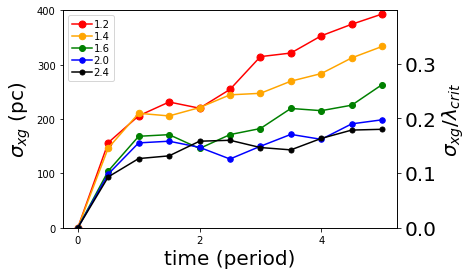

In [8]:
fig, ax1 = plt.subplots()
ax1.plot(tarr,stdarrx5,'r-o',label='1.2',ms=7)
ax1.plot(tarr,stdarrx4,'-o',label='1.4', color='orange',ms=6.5)
ax1.plot(tarr,stdarrx3,'g-o',label='1.6',ms=6)
ax1.plot(tarr,stdarrx2,'b-o',label='2.0',ms=5.5)
ax1.plot(tarr,stdarrx1,'k-o',label='2.4',ms=5)

ax1.set_xlabel('time (period)',fontsize=20)
ax1.set_ylabel(r'$\sigma_{xg}$ (pc)',fontsize=20)
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)
xgmax =400.
ax1.set_ylim(0,xgmax)
ax2 = ax1.twinx()

ax2.set_ylabel(r"$\sigma_{xg}/\lambda_{crit}$",fontsize=20)
ax2.set_ylim(0,xgmax/lambda_crit)
ax1.legend(loc='upper left',labelspacing=0.2,handletextpad=0.2)
plt.savefig('sig_xg.png')
#sig_xg.png

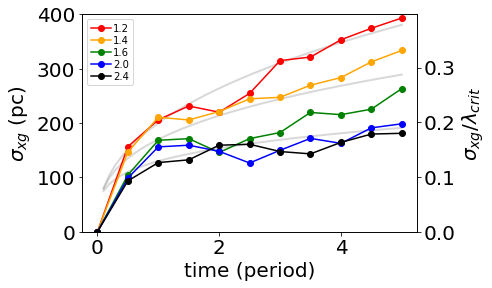

In [9]:
# try some lines
def diffu(t,fac,pow):
    return fac*t**pow

fig, ax1 = plt.subplots()
fac=1

tt = np.linspace(0.1,5.0,51)
d1 = diffu(tt,200,0.4)
ax1.plot(tt,d1,'-', color='gray', linewidth=2, alpha=0.3)

d3 = diffu(tt,170,0.33)
ax1.plot(tt,d3,'-', color='gray', linewidth=2, alpha=0.3)

d2 = diffu(tt,130,0.24)
ax1.plot(tt,d2,'-', color='gray', linewidth=2, alpha=0.3)

ax1.plot(tarr,stdarrx5,'r-o',label='1.2')
ax1.plot(tarr,stdarrx4,'-o',label='1.4', color='orange')
ax1.plot(tarr,stdarrx3,'g-o',label='1.6')
ax1.plot(tarr,stdarrx2,'b-o',label='2.0')
ax1.plot(tarr,stdarrx1,'k-o',label='2.4')

ax1.set_xlabel('time (period)',fontsize=20)
ax1.set_ylabel(r'$\sigma_{xg}$ (pc)',fontsize=20)
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)
xgmax =400.
ax1.set_ylim(0,xgmax)
ax2 = ax1.twinx()

#ax2.plot(tarr,stdarrx1/lambda_crit, 'b.',ms=0.001)
ax2.set_ylabel(r"$\sigma_{xg}/\lambda_{crit}$",fontsize=20)
ax2.set_ylim(0,xgmax/lambda_crit)
ax1.legend(loc='upper left',labelspacing=0.2,handletextpad=0.2)
# not used!!!!

In [10]:
# plot surface density with color bar and axes
def pltdens_cb_5(fname1,fname2, fname3, fname4, fname5, vmax,massless, pname):
    hist1,xedges,yedges = massive_xyhist(fname1)
    hist2,xedges,yedges = massive_xyhist(fname2)
    hist3,xedges,yedges = massive_xyhist(fname3)
    hist4,xedges,yedges = massive_xyhist(fname4)
    hist5,xedges,yedges = massive_xyhist(fname5)
    #dx = xedges[1]-xedges[0]
    Y, X = np.meshgrid(yedges/lambda_crit, xedges/lambda_crit)
    nsmo=0.7  #smooth the image somewhat
    hist_smo1 = ndimage.gaussian_filter(hist1/10, sigma=(nsmo, nsmo), order=0)
    hist_smo2 = ndimage.gaussian_filter(hist2/10, sigma=(nsmo, nsmo), order=0)
    hist_smo3 = ndimage.gaussian_filter(hist3/10, sigma=(nsmo, nsmo), order=0)
    hist_smo4 = ndimage.gaussian_filter(hist4/10, sigma=(nsmo, nsmo), order=0)
    hist_smo5 = ndimage.gaussian_filter(hist5/10, sigma=(nsmo, nsmo), order=0)
    xarr1,yarr1 = massless_xy(fname1)
    xarr2,yarr2 = massless_xy(fname2)
    xarr3,yarr3 = massless_xy(fname3)
    xarr4,yarr4 = massless_xy(fname4)
    xarr5,yarr5 = massless_xy(fname5)
    
    xarr1 = xarr1*0.0
    yarr1 = 4000.0*rand(len(xarr1))-2000.0  # get rid of points!!!! because of reset
    xm = X.max()
    
    f,axarr =  plt.subplots(1,5, dpi=300, figsize=(12,2.3), sharex=True)
    #print([X.min(), X.max(), Y.min(), Y.max()])
    #plt.axis([X.min(), X.max(), Y.min(), Y.max()])
    #plt.axis("tight")
    #plt.autoscale(axis='x', tight=True)
    #plt.autoscale(axis='y', tight=True)
    plt.subplots_adjust(left=0.16, right=0.98, top=0.85, bottom=0.15)
    plt.subplots_adjust(wspace=0.05, hspace=0.1)
    matplotlib.rc('xtick', labelsize=17); matplotlib.rc('ytick', labelsize=17)
    
    xa = -2.0
    ya = 2.25
    if (massless==1):
        xa = -2.0
    
    il=0
    #axarr[il].set_ylim([xedges.min()/lambda_crit, xedges.max()/lambda_crit])
    #axarr[il].set_xlim([xedges.min()/lambda_crit, xedges.max()/lambda_crit])
    im = axarr[il].pcolormesh(X, Y, hist_smo1,cmap='copper',vmin=0,vmax=vmax/10)
    axarr[il].set_aspect('equal')
    axarr[il].set_xticks(np.arange(-1, 2, 1.0))
    axarr[il].set_yticks(np.arange(-1, 2, 1.0))
    axarr[il].set_xlim(-xm,xm)
    axarr[il].set_ylim(-xm,xm)
    if (massless==0):
        axarr[il].text(xa,ya,'X1 t=2.5', ha="left", va="center", size=18)
    else:
        axarr[il].plot(xarr1/lambda_crit,yarr1/lambda_crit,'.',color='lime',ms=1.5)
        axarr[il].text(xa,ya,'X2 t=0', ha="left", va="center", size=18)
    
    il=1
    im = axarr[il].pcolormesh(X, Y, hist_smo2,cmap='copper',vmin=0,vmax=vmax/10)
    axarr[il].set_aspect('equal')
    plt.setp(axarr[il].get_xticklabels(), visible=False)
    plt.setp(axarr[il].get_yticklabels(), visible=False)
    axarr[il].set_yticks(np.arange(-1, 2, 1.0))
    if (massless==0):
        axarr[il].text(xa,ya,'X2', ha="left", va="center", size=18)
    else:
        axarr[il].plot(xarr2/lambda_crit,yarr2/lambda_crit,'.',color='lime',ms=1.5)
        axarr[il].text(xa,ya,'0.5', ha="left", va="center", size=18)
    il=2
    im = axarr[il].pcolormesh(X, Y, hist_smo3,cmap='copper',vmin=0,vmax=vmax/10)
    axarr[il].set_aspect('equal')
    plt.setp(axarr[il].get_xticklabels(), visible=False)
    plt.setp(axarr[il].get_yticklabels(), visible=False)
    axarr[il].set_yticks(np.arange(-1, 2, 1.0))
    if (massless==0):
        axarr[il].text(xa,ya,'X3', ha="left", va="center", size=18)
    else:
        axarr[il].plot(xarr3/lambda_crit,yarr3/lambda_crit,'.',color='lime',ms=1.5)
        axarr[il].text(xa,ya,'1.0', ha="left", va="center", size=18)
    il=3
    im = axarr[il].pcolormesh(X, Y, hist_smo4,cmap='copper',vmin=0,vmax=vmax/10)
    axarr[il].set_aspect('equal')
    plt.setp(axarr[il].get_xticklabels(), visible=False)
    plt.setp(axarr[il].get_yticklabels(), visible=False)
    axarr[il].set_yticks(np.arange(-1, 2, 1.0))
    if (massless==0):
        axarr[il].text(xa,ya,'X4', ha="left", va="center", size=18)
    else:
        axarr[il].plot(xarr4/lambda_crit,yarr4/lambda_crit,'.',color='lime',ms=1.5)
        axarr[il].text(xa,ya,'2.5', ha="left", va="center", size=18)
    il=4
    im = axarr[il].pcolormesh(X, Y, hist_smo5,cmap='copper',vmin=0,vmax=vmax/10)
    axarr[il].set_aspect('equal')
    #axarr[il].set_xticks([]);  axarr[il].set_yticks([]); axarr[il].set_aspect('equal')
    plt.setp(axarr[il].get_xticklabels(), visible=False)
    plt.setp(axarr[il].get_yticklabels(), visible=False)
    axarr[il].set_yticks(np.arange(-1, 2, 1.0))
    if (massless==0):
        axarr[il].text(xa,ya,'X5', ha="left", va="center", size=18)
    else:
        axarr[il].plot(xarr5/lambda_crit,yarr5/lambda_crit,'.',color='lime',ms=1.5)
        axarr[il].text(xa,ya,'5.0', ha="left", va="center", size=18)
    
    cb = f.colorbar(im,ax=axarr.ravel().tolist(), ticks=np.arange(0,3.0, 0.5), aspect=15,
               pad=0.01)
    cb.ax.set_yticklabels(cb.ax.get_yticklabels(), fontsize=12)
    
    #il=0
    #axarr[il].set_xticks(np.arange(-1, 2, 1.0))
    
    #axarr[4].colorbar(im, ax=ax, shrink=0.90)
    if (len(pname) > 3): 
        plt.savefig(pname)
        

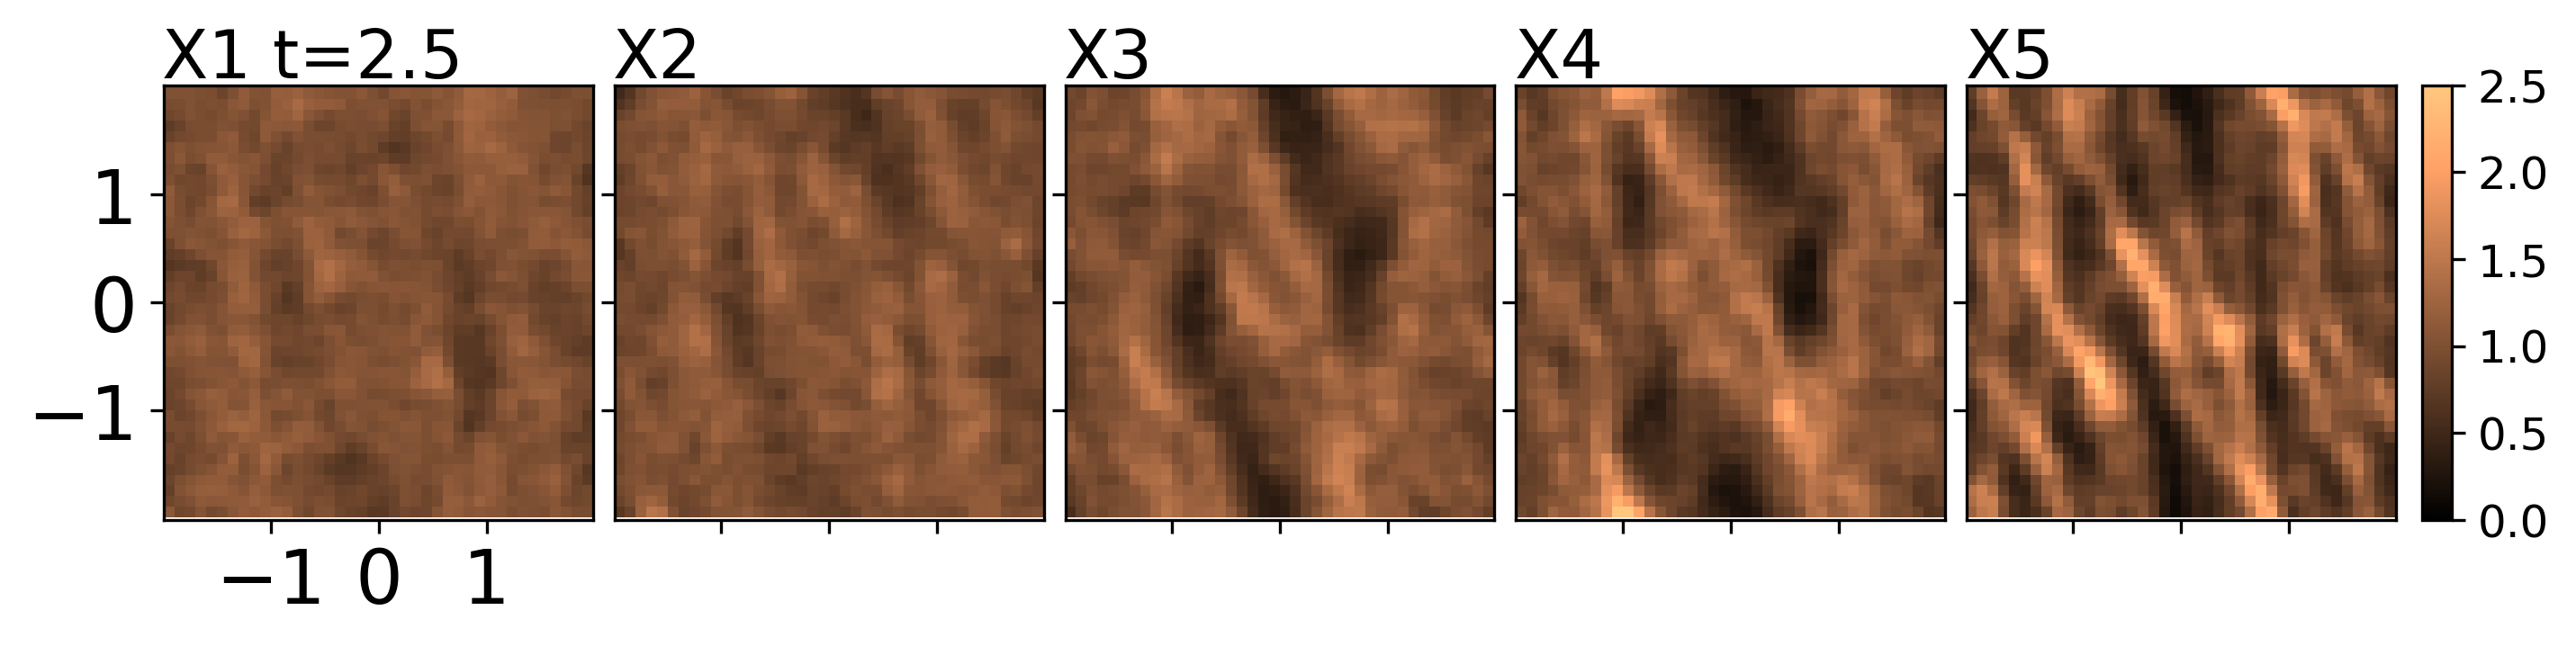

In [11]:
smax=25
fname1 = "../save_x1/ss0009.txt" 
fname2 = "../save_x2/ss0009.txt" 
fname3 = "../save_x3/ss0009.txt" 
fname4 = "../save_x4/ss0009.txt" 
fname5 = "../save_x5/ss0009.txt" 
pltdens_cb_5(fname1,fname2,fname3,fname4,fname5,smax,0,"dens_all.png"); 

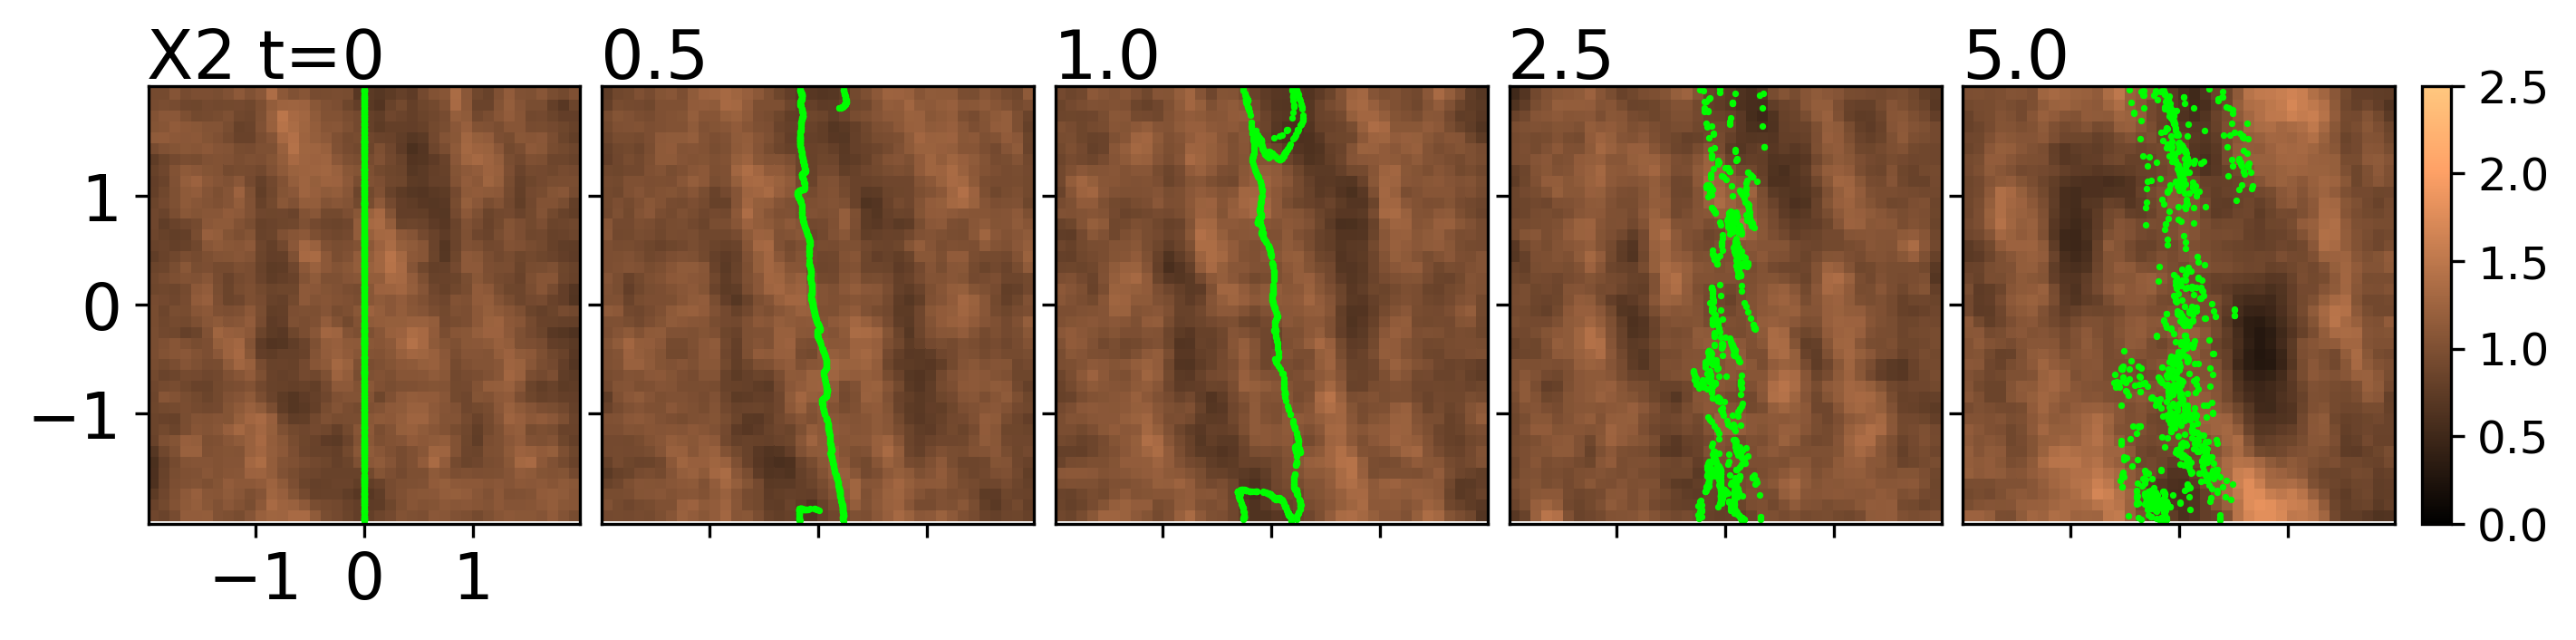

In [12]:
smax=25
fname1 = "../save_x2/ss0004.txt" 
fname2 = "../save_x2/ss0005.txt" 
fname3 = "../save_x2/ss0006.txt" 
fname4 = "../save_x2/ss0009.txt" 
fname5 = "../save_x2/ss0013.txt" 
pltdens_cb_5(fname1,fname2, fname3, fname4, fname5,smax,1,"line_all.png") 


mean, sig, sig/mean 10.0 2.18410256169 0.218410256169
vertical std height  143.676946727
mean, sig, sig/mean 10.0 2.3594440023 0.23594440023
vertical std height  143.655248914
mean, sig, sig/mean 10.0 3.24050366456 0.324050366456
vertical std height  142.892662178
mean, sig, sig/mean 10.0 3.98289141203 0.398289141203
vertical std height  141.244628333
mean, sig, sig/mean 10.0 5.20473630456 0.520473630456
vertical std height  140.418598182


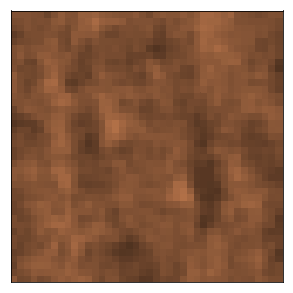

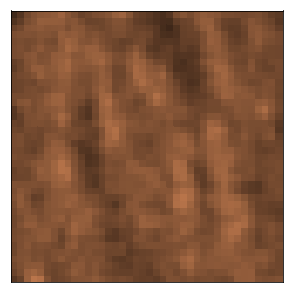

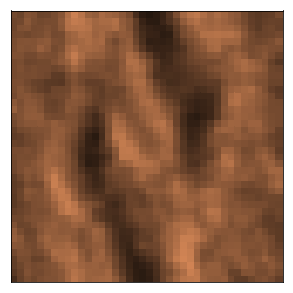

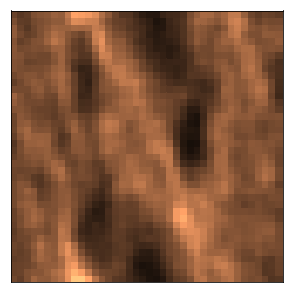

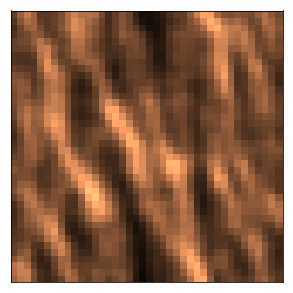

In [13]:
smax=25
fname = "../save_x1/ss0009.txt" 
pltdens(fname,smax,"dens_a.png"); h = geth(fname)
fname = "../save_x2/ss0009.txt" 
pltdens(fname,smax,"dens_b.png"); h = geth(fname)
fname = "../save_x3/ss0009.txt" 
pltdens(fname,smax,"dens_c.png"); h = geth(fname)
fname = "../save_x4/ss0009.txt" 
pltdens(fname,smax,"dens_d.png"); h = geth(fname)
fname = "../save_x5/ss0009.txt" 
pltdens(fname,smax,"dens_e.png"); h = geth(fname)

max freq in fft is  0.00487804878049
max freq in fft times lambda_crit  4.91219512195
max freq, wav, ang 0.000545382433537 1833.57574155 43.451842301
eigen= 0.00182276206406 0.0020758230499 inv eigen= 548.617957174 481.736629741
angle (deg)=  40.9376134129

max freq in fft is  0.00487804878049
max freq in fft times lambda_crit  4.91219512195
max freq, wav, ang 0.000545382433537 1833.57574155 43.451842301
eigen= 0.00126223021729 0.00220320364028 inv eigen= 792.248502926 453.884507867
angle (deg)=  18.4400094983

max freq in fft is  0.00487804878049
max freq in fft times lambda_crit  4.91219512195
max freq, wav, ang 0.000771287234187 1296.53384067 41.8201698801
eigen= 0.0014949870241 0.00179589059311 inv eigen= 668.902126826 556.826793256
angle (deg)=  4.56890264148

max freq in fft is  0.00487804878049
max freq in fft times lambda_crit  4.91219512195
max freq, wav, ang 0.000771287234187 1296.53384067 41.8201698801
eigen= 0.00137711196989 0.00182298997717 inv eigen= 726.157365461 548.549

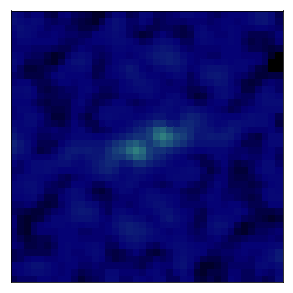

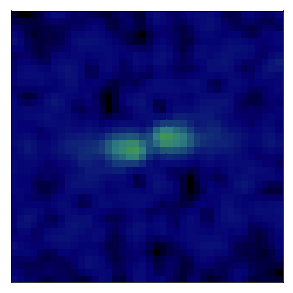

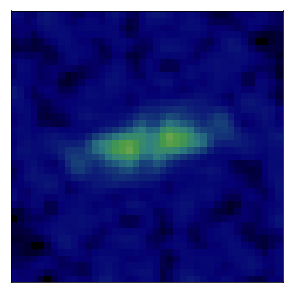

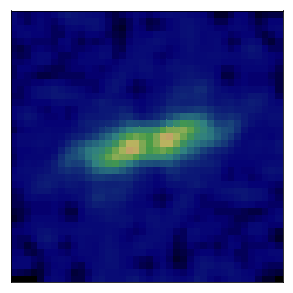

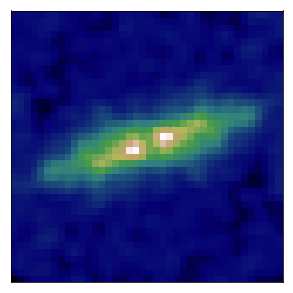

In [14]:
fname = "../save_x1/ss0008.txt" 
pltfft(fname,"fft_a.png")
fname = "../save_x2/ss0008.txt" 
pltfft(fname,"fft_b.png")
fname = "../save_x3/ss0008.txt" 
pltfft(fname,"fft_c.png")
fname = "../save_x4/ss0008.txt" 
pltfft(fname,"fft_d.png")
fname = "../save_x5/ss0008.txt" 
pltfft(fname,"fft_e.png")

In [56]:
# plot ffts5 images at once with colorbar
def pltfft_5(fname1,fname2,fname3,fname4,fname5, pname):
    matplotlib.rc('xtick', labelsize=16) 
    matplotlib.rc('ytick', labelsize=18)
    hist1,xedges,yedges = massive_xyhist(fname1)
    hist2,xedges,yedges = massive_xyhist(fname2)
    hist3,xedges,yedges = massive_xyhist(fname3)
    hist4,xedges,yedges = massive_xyhist(fname4)
    hist5,xedges,yedges = massive_xyhist(fname5)
    dx = (xedges[1]-xedges[0])/lambda_crit
    Z1 = fftn(hist1- np.mean(hist1)) # subtract the mean
    Z2 = fftn(hist2- np.mean(hist2)) # subtract the mean
    Z3 = fftn(hist3- np.mean(hist3)) # subtract the mean
    Z4 = fftn(hist4- np.mean(hist4)) # subtract the mean
    Z5 = fftn(hist5- np.mean(hist5)) # subtract the mean
    Zshift1 = fftshift(Z1)
    Zshift2 = fftshift(Z2)
    Zshift3 = fftshift(Z3)
    Zshift4 = fftshift(Z4)
    Zshift5 = fftshift(Z5)
    Zmag1 = np.sqrt(np.real(Zshift1)**2 + np.imag(Zshift1)**2)  # power amplitude
    Zmag2 = np.sqrt(np.real(Zshift2)**2 + np.imag(Zshift2)**2)  # power amplitude
    Zmag3 = np.sqrt(np.real(Zshift3)**2 + np.imag(Zshift3)**2)  # power amplitude
    Zmag4 = np.sqrt(np.real(Zshift4)**2 + np.imag(Zshift4)**2)  # power amplitude
    Zmag5 = np.sqrt(np.real(Zshift5)**2 + np.imag(Zshift5)**2)  # power amplitude
    N = np.size(xedges-1)
    xfreq = fftshift(fftfreq(N, dx))
    #lambdas = 1.0/xfreq
    YYF, XXF = np.meshgrid(xfreq,xfreq)  # for showing fft image
    #print("max freq in fft is ",np.max(xfreq))
    #print("max freq in fft times lambda_crit ",np.max(xfreq)*lambda_crit)
    nsmo=1.0  #smooth fft
    img1 = ndimage.gaussian_filter(Zmag1, sigma=(nsmo, nsmo), order=0)
    img2 = ndimage.gaussian_filter(Zmag2, sigma=(nsmo, nsmo), order=0)
    img3 = ndimage.gaussian_filter(Zmag3, sigma=(nsmo, nsmo), order=0)
    img4 = ndimage.gaussian_filter(Zmag4, sigma=(nsmo, nsmo), order=0)
    img5 = ndimage.gaussian_filter(Zmag5, sigma=(nsmo, nsmo), order=0)
    
    f,axarr =  plt.subplots(1,5, dpi=300, figsize=(12,2.4), sharey=True, sharex=True)
    plt.subplots_adjust(wspace=0.05, hspace=0.1)
    plt.subplots_adjust(left=0.16, right=0.98, top=0.85, bottom=0.15)
    matplotlib.rc('xtick', labelsize=18); matplotlib.rc('ytick', labelsize=18)
    #plt.autoscale(axis='x', tight=True)
    #plt.autoscale(axis='y', tight=True)
     
    xa = -3.9
    ya = 5.6
    vmax=800
    imoffset=40
    
    il=0
    imm = axarr[il].pcolormesh(XXF,YYF,(img1-imoffset)/vmax,vmin=0,vmax=1,cmap='gist_earth')
    axarr[il].text(xa,ya,'X1', ha="center", va="center", size=18)
    axarr[il].set_xlim(-4.95,4.95)
    axarr[il].set_ylim(-4.95,4.95)
    #axarr[il].spines['bottom'].set_color('yellow')
    #matplotlib.rc('xtick', direction= 'in')
    axarr[il].tick_params(axis='y', direction='out')
    axarr[il].yaxis.tick_left()
    axarr[il].tick_params(axis='x', direction='out')
    axarr[il].xaxis.tick_bottom()
    il=1
    imm = axarr[il].pcolormesh(XXF,YYF,(img2-imoffset)/vmax,vmin=0,vmax=1,cmap='gist_earth')
    plt.setp(axarr[il].get_xticklabels(), visible=False)
    plt.setp(axarr[il].get_yticklabels(), visible=False)
    axarr[il].text(xa,ya,'X2', ha="center", va="center", size=18)
    il=2
    imm = axarr[il].pcolormesh(XXF,YYF,(img3-imoffset)/vmax,vmin=0,vmax=1,cmap='gist_earth')
    plt.setp(axarr[il].get_xticklabels(), visible=False)
    plt.setp(axarr[il].get_yticklabels(), visible=False)
    axarr[il].text(xa,ya,'X3', ha="center", va="center", size=18)
    il=3
    imm = axarr[il].pcolormesh(XXF,YYF,(img4-imoffset)/vmax,vmin=0,vmax=1,cmap='gist_earth')
    plt.setp(axarr[il].get_xticklabels(), visible=False)
    plt.setp(axarr[il].get_yticklabels(), visible=False)
    axarr[il].text(xa,ya,'X4', ha="center", va="center", size=18)
    il=4
    imm = axarr[il].pcolormesh(XXF,YYF,(img5-imoffset)/vmax,vmin=0,vmax=1,cmap='gist_earth')
    plt.setp(axarr[il].get_xticklabels(), visible=False)
    plt.setp(axarr[il].get_yticklabels(), visible=False)
    axarr[il].text(xa,ya,'X5', ha="center", va="center", size=18)
    
    cb = f.colorbar(imm,ax=axarr.ravel().tolist(), ticks=np.linspace(0,1,5), 
                    aspect=15, pad=0.01)
    cb.ax.set_yticklabels(cb.ax.get_yticklabels(), fontsize=12)
    
    #plt.colorbar()
    if (len(pname) > 3): 
        plt.savefig(pname)
        

    


In [54]:
# plot ffts5 images at once with colorbar, with sin wave!
def pltfft_5_comp(fname1,fname2,fname3,fname4,fname5, pname):
    matplotlib.rc('xtick', labelsize=16) 
    matplotlib.rc('ytick', labelsize=18)
    hist1,xedges,yedges = massive_xyhist(fname1)
    hist2,xedges,yedges = massive_xyhist(fname2)
    hist3,xedges,yedges = massive_xyhist(fname3)
    hist4,xedges,yedges = massive_xyhist(fname4)
    hist5,xedges,yedges = massive_xyhist(fname5)
    dx = (xedges[1]-xedges[0])/lambda_crit
    
    print(np.mean(hist1))
    nx = len(xedges)
    for i in range(0,nx-1):
        for j in range(0,nx-1):
            hist1[i,j] = 5*np.sin(10.0*np.pi*i/nx)
    Z1 = fftn(hist1- np.mean(hist1)) # subtract the mean
    Z2 = fftn(hist2- np.mean(hist2)) # subtract the mean
    Z3 = fftn(hist3- np.mean(hist3)) # subtract the mean
    Z4 = fftn(hist4- np.mean(hist4)) # subtract the mean
    Z5 = fftn(hist5- np.mean(hist5)) # subtract the mean
    
    
    Zshift1 = fftshift(Z1)
    Zshift2 = fftshift(Z2)
    Zshift3 = fftshift(Z3)
    Zshift4 = fftshift(Z4)
    Zshift5 = fftshift(Z5)
    Zmag1 = np.sqrt(np.real(Zshift1)**2 + np.imag(Zshift1)**2)  # power amplitude
    Zmag2 = np.sqrt(np.real(Zshift2)**2 + np.imag(Zshift2)**2)  # power amplitude
    Zmag3 = np.sqrt(np.real(Zshift3)**2 + np.imag(Zshift3)**2)  # power amplitude
    Zmag4 = np.sqrt(np.real(Zshift4)**2 + np.imag(Zshift4)**2)  # power amplitude
    Zmag5 = np.sqrt(np.real(Zshift5)**2 + np.imag(Zshift5)**2)  # power amplitude
    N = np.size(xedges-1)
    xfreq = fftshift(fftfreq(N, dx))
    #lambdas = 1.0/xfreq
    YYF, XXF = np.meshgrid(xfreq,xfreq)  # for showing fft image
    #print("max freq in fft is ",np.max(xfreq))
    #print("max freq in fft times lambda_crit ",np.max(xfreq)*lambda_crit)
    nsmo=1.0  #smooth fft
    img1 = ndimage.gaussian_filter(Zmag1, sigma=(nsmo, nsmo), order=0)
    img2 = ndimage.gaussian_filter(Zmag2, sigma=(nsmo, nsmo), order=0)
    img3 = ndimage.gaussian_filter(Zmag3, sigma=(nsmo, nsmo), order=0)
    img4 = ndimage.gaussian_filter(Zmag4, sigma=(nsmo, nsmo), order=0)
    img5 = ndimage.gaussian_filter(Zmag5, sigma=(nsmo, nsmo), order=0)
    
    f,axarr =  plt.subplots(1,5, dpi=300, figsize=(12,2.4), sharey=True, sharex=True)
    plt.subplots_adjust(wspace=0.05, hspace=0.1)
    plt.subplots_adjust(left=0.16, right=0.98, top=0.85, bottom=0.15)
    matplotlib.rc('xtick', labelsize=18); matplotlib.rc('ytick', labelsize=18)
    #plt.autoscale(axis='x', tight=True)
    #plt.autoscale(axis='y', tight=True)
     
    xa = -3.9
    ya = 5.6
    vmax=800
    imoffset=40
    
    il=0
    imm = axarr[il].pcolormesh(XXF,YYF,(img1-imoffset)/vmax,vmin=0,vmax=1,cmap='gist_earth')
    axarr[il].text(xa,ya,'X1', ha="center", va="center", size=18)
    axarr[il].set_xlim(-4.95,4.95)
    axarr[il].set_ylim(-4.95,4.95)
    #axarr[il].spines['bottom'].set_color('yellow')
    #matplotlib.rc('xtick', direction= 'in')
    axarr[il].tick_params(axis='y', direction='out')
    axarr[il].yaxis.tick_left()
    axarr[il].tick_params(axis='x', direction='out')
    axarr[il].xaxis.tick_bottom()
    il=1
    imm = axarr[il].pcolormesh(XXF,YYF,(img2-imoffset)/vmax,vmin=0,vmax=1,cmap='gist_earth')
    plt.setp(axarr[il].get_xticklabels(), visible=False)
    plt.setp(axarr[il].get_yticklabels(), visible=False)
    axarr[il].text(xa,ya,'X2', ha="center", va="center", size=18)
    il=2
    imm = axarr[il].pcolormesh(XXF,YYF,(img3-imoffset)/vmax,vmin=0,vmax=1,cmap='gist_earth')
    plt.setp(axarr[il].get_xticklabels(), visible=False)
    plt.setp(axarr[il].get_yticklabels(), visible=False)
    axarr[il].text(xa,ya,'X3', ha="center", va="center", size=18)
    il=3
    imm = axarr[il].pcolormesh(XXF,YYF,(img4-imoffset)/vmax,vmin=0,vmax=1,cmap='gist_earth')
    plt.setp(axarr[il].get_xticklabels(), visible=False)
    plt.setp(axarr[il].get_yticklabels(), visible=False)
    axarr[il].text(xa,ya,'X4', ha="center", va="center", size=18)
    il=4
    imm = axarr[il].pcolormesh(XXF,YYF,(img5-imoffset)/vmax,vmin=0,vmax=1,cmap='gist_earth')
    plt.setp(axarr[il].get_xticklabels(), visible=False)
    plt.setp(axarr[il].get_yticklabels(), visible=False)
    axarr[il].text(xa,ya,'X5', ha="center", va="center", size=18)
    
    cb = f.colorbar(imm,ax=axarr.ravel().tolist(), ticks=np.linspace(0,1,5), 
                    aspect=15, pad=0.01)
    cb.ax.set_yticklabels(cb.ax.get_yticklabels(), fontsize=12)
    
    
    #plt.colorbar()
    if (len(pname) > 3): 
        plt.savefig(pname)
        
    


10.0


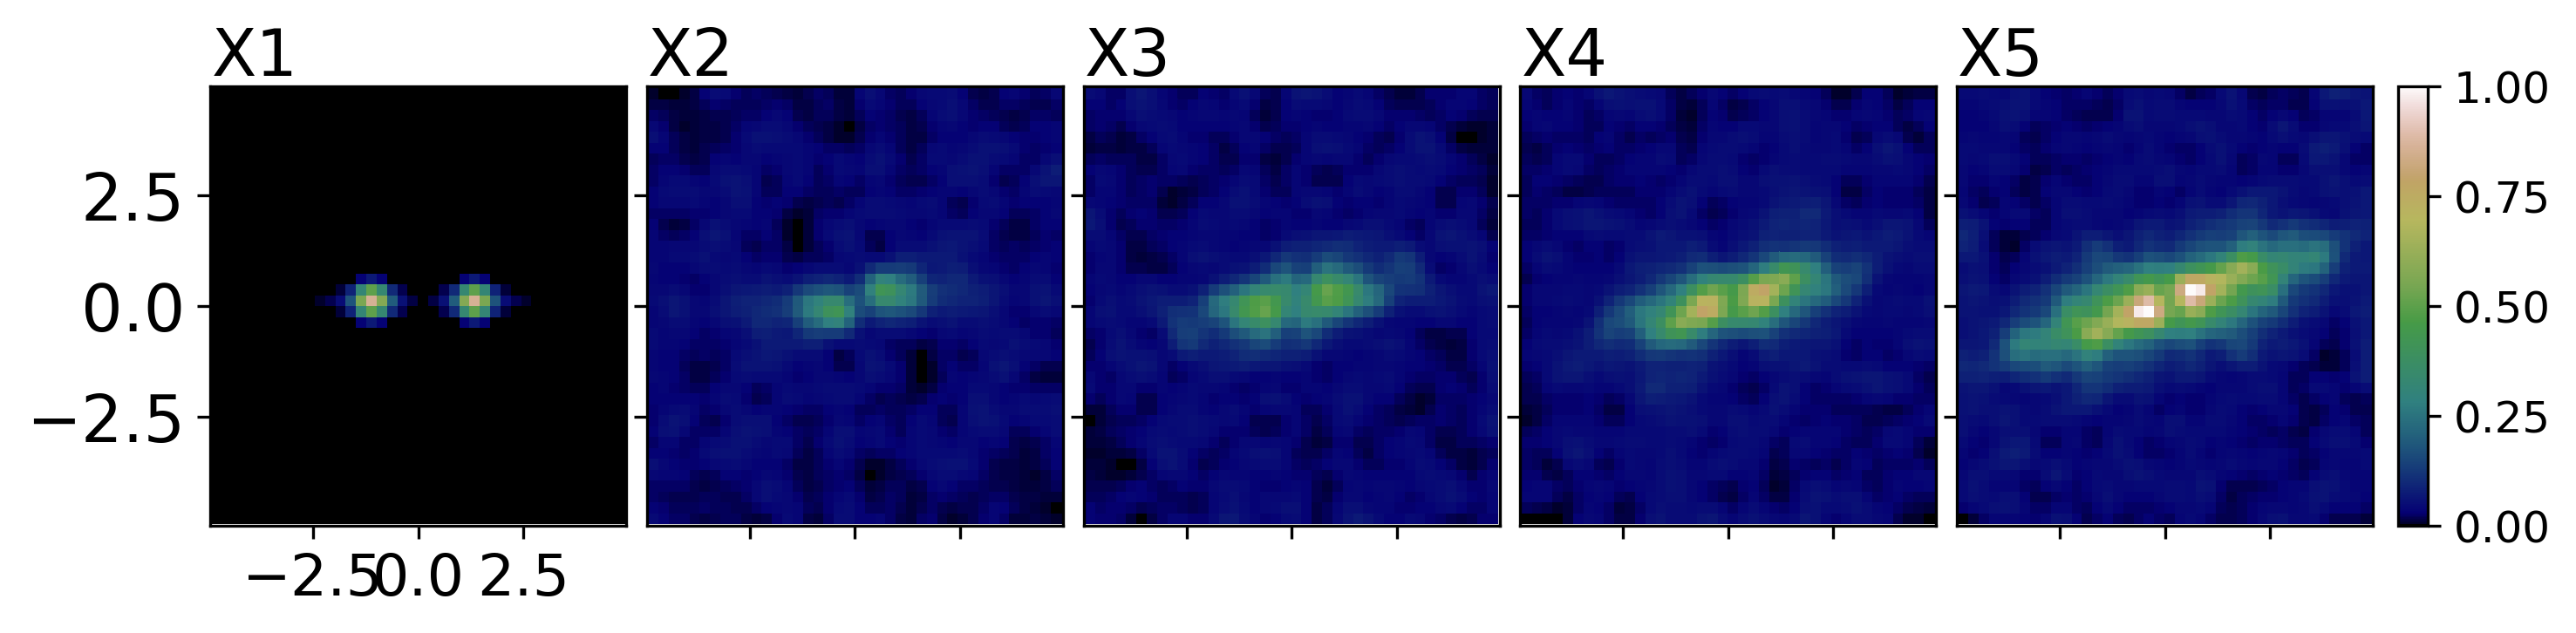

In [55]:
fname1 = "../save_x1/ss0008.txt" 
fname2 = "../save_x2/ss0008.txt" 
fname3 = "../save_x3/ss0008.txt" 
fname4 = "../save_x4/ss0008.txt" 
fname5 = "../save_x5/ss0008.txt" 
pltfft_5_comp(fname1,fname2,fname3,fname4,fname5,"")

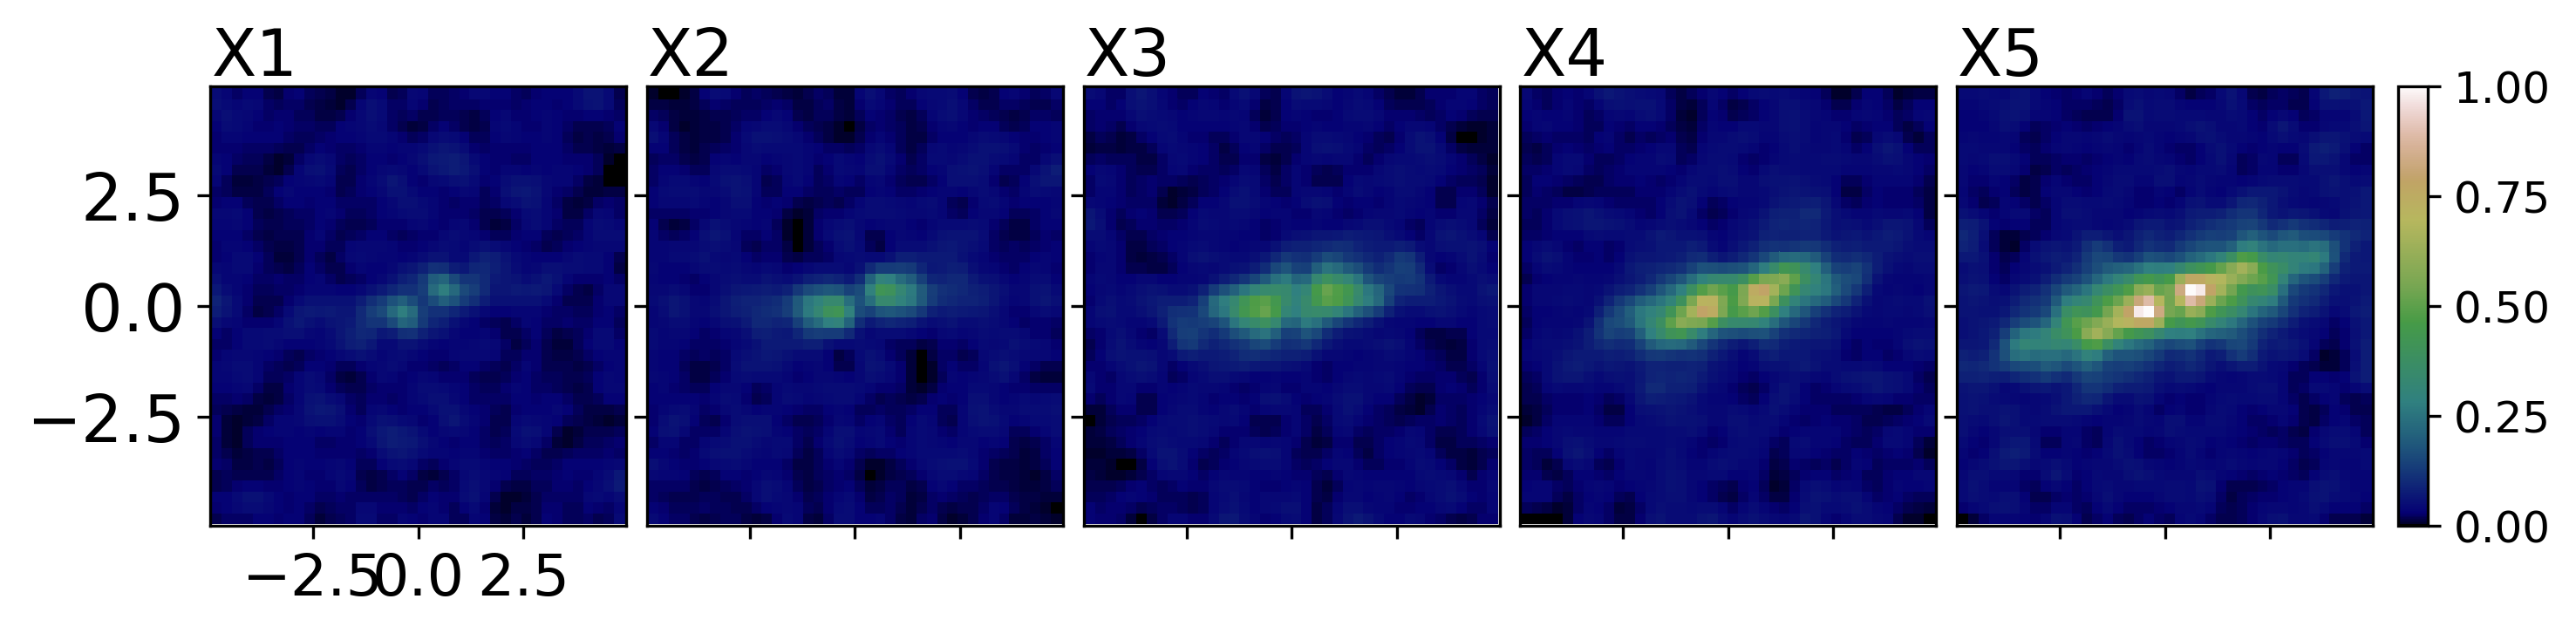

In [57]:
fname1 = "../save_x1/ss0008.txt" 
fname2 = "../save_x2/ss0008.txt" 
fname3 = "../save_x3/ss0008.txt" 
fname4 = "../save_x4/ss0008.txt" 
fname5 = "../save_x5/ss0008.txt" 
pltfft_5(fname1,fname2,fname3,fname4,fname5,"fft_all.png")

In [17]:
# distribution of xg for one simulation
fname = "../save_x3/ss0005.txt" 
xgarr_x3a = getxgarr(fname)
fname = "../save_x3/ss0009.txt" 
xgarr_x3b = getxgarr(fname)
fname = "../save_x3/ss0014.txt" 
xgarr_x3c = getxgarr(fname)
# times are 0.5, 2.5, 5 periods

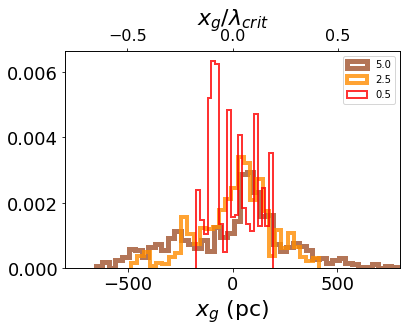

In [18]:
# xg distribution at different times figure
fig, ax1 = plt.subplots()
matplotlib.rc('xtick', labelsize=16) 
matplotlib.rc('ytick', labelsize=18)

bb = ax1.hist(xgarr_x3c, bins=50, normed=1, alpha=0.8,
        edgecolor = 'sienna',fill=0,histtype='step',linewidth=5.0, label='5.0')
bb = ax1.hist(xgarr_x3b, bins=30, normed=1, alpha=0.8,
        edgecolor = 'darkorange',fill=0,histtype='step',linewidth=4.0, label='2.5')
bb = ax1.hist(xgarr_x3a, bins=20, normed=1, alpha=0.8,
        edgecolor = 'red',fill=0,histtype='step',linewidth=2.0, label='0.5')
xmax = 800.0
ax1.set_xlim(-xmax,xmax)
ax1.set_xlabel(r'$x_g$ (pc)',fontsize=22)
ax1.legend(loc='upper right')
ax2 = ax1.twiny()
ax2.set_xlim(-xmax/lambda_crit,xmax/lambda_crit)
ax2.set_xlabel(r'$x_g/\lambda_{crit}$',fontsize=22)
plt.savefig('dist_xg.png')

In [19]:
# not used
fname = "../save_x5/ss0005.txt" 
xgarr_x5a = getxgarr(fname)
fname = "../save_x5/ss0009.txt" 
xgarr_x5b = getxgarr(fname)
fname = "../save_x5/ss0014.txt" 
xgarr_x5c = getxgarr(fname)

Text(0.5,0,'$x_g/\\lambda_{crit}$')

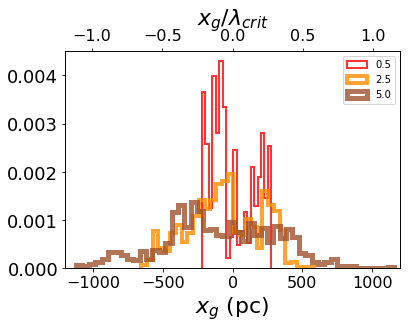

In [20]:
fig, ax1 = plt.subplots()
matplotlib.rc('xtick', labelsize=16) 
matplotlib.rc('ytick', labelsize=18)
bb = ax1.hist(xgarr_x5a, bins=20, normed=1, alpha=0.8,
        edgecolor = 'red',fill=0,histtype='step',linewidth=2.0, label='0.5')
bb = ax1.hist(xgarr_x5b, bins=30, normed=1, alpha=0.8,
        edgecolor = 'darkorange',fill=0,histtype='step',linewidth=4.0, label='2.5')
bb = ax1.hist(xgarr_x5c, bins=50, normed=1, alpha=0.8,
        edgecolor = 'sienna',fill=0,histtype='step',linewidth=5.0, label='5.0')
xmax = 1200.0
ax1.set_xlim(-xmax,xmax)
ax1.set_xlabel(r'$x_g$ (pc)',fontsize=22)
ax1.legend(loc='upper right')
ax2 = ax1.twiny()
ax2.set_xlim(-xmax/lambda_crit,xmax/lambda_crit)
ax2.set_xlabel(r'$x_g/\lambda_{crit}$',fontsize=22)
  # this one is x5! not used!!!

In [21]:
# std distribution of vx  to show heating, not used
root = "../save_x1/ss00"  
stdarrvx1,tarr= getstds_vx(root)
root = "../save_x2/ss00"
stdarrvx2,tarr= getstds_vx(root)
root = "../save_x3/ss00"
stdarrvx3,tarr= getstds_vx(root)
root = "../save_x4/ss00"
stdarrvx4,tarr= getstds_vx(root)
root = "../save_x5/ss00"
stdarrvx5,tarr= getstds_vx(root)



In [22]:
# mean  A epicyclic
root = "../save_x1/ss00"  
stdarrA1,tarr= getstds_epi(root)
root = "../save_x2/ss00"
stdarrA2,tarr= getstds_epi(root)
root = "../save_x3/ss00"
stdarrA3,tarr= getstds_epi(root)
root = "../save_x4/ss00"
stdarrA4,tarr= getstds_epi(root)
root = "../save_x5/ss00"
stdarrA5,tarr= getstds_epi(root)


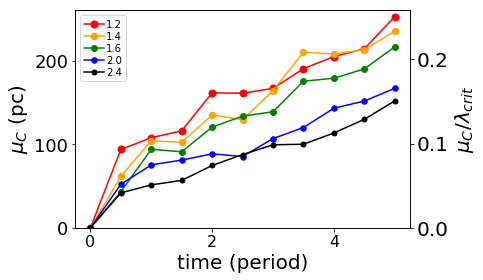

In [23]:
# showing heating
fig, ax1 = plt.subplots()
fac=1

#tt = np.linspace(0.1,5.0,51)
#d1 = diffu(tt,200,0.4)
#ax1.plot(tt,d1,'-', color='gray', linewidth=2, alpha=0.3)

#d3 = diffu(tt,170,0.33)
#ax1.plot(tt,d3,'-', color='gray', linewidth=2, alpha=0.3)

#d2 = diffu(tt,130,0.24)
#ax1.plot(tt,d2,'-', color='gray', linewidth=2, alpha=0.3)

ax1.plot(tarr,stdarrA5,'r-o',label='1.2',ms=7)
ax1.plot(tarr,stdarrA4,'-o',label='1.4', color='orange',ms=6.5)
ax1.plot(tarr,stdarrA3,'g-o',label='1.6',ms=6)
ax1.plot(tarr,stdarrA2,'b-o',label='2.0',ms=5.5)
ax1.plot(tarr,stdarrA1,'k-o',label='2.4',ms=5)

ax1.set_xlabel('time (period)',fontsize=20)
ax1.set_ylabel(r'$\mu_{C}$ (pc)',fontsize=20)
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)
xgmax =260.
ax1.set_ylim(0,xgmax)
#ax1.set_xlim(0,5.1)
ax2 = ax1.twinx()

ax2.plot(tarr,stdarrA1/lambda_crit, 'b.',ms=0.001)
ax2.set_ylabel(r"$\mu_{C}/\lambda_{crit}$",fontsize=20)
ax2.set_ylim(0,xgmax/lambda_crit)
ax1.legend(loc='upper left',labelspacing=0.2,handletextpad=0.2)
plt.savefig('mu_A.png')

In [24]:
root = "../save_x3_s/ss00"
stdarrx3_s,tarr= getstds(root)
root = "../save_x3_n/ss00"
stdarrx3_n,tarr= getstds(root)
root = "../save_x3_ha/ss00"
stdarrx3_ha,tarr= getstds(root)
root = "../save_x3_hb/ss00"
stdarrx3_hb,tarr= getstds(root)
root = "../save_x3/ss00"
stdarrx3,tarr= getstds(root)


In [25]:
root = "../save_x3_hma/ss00"
stdarrx3_hma,tarr= getstds(root)
root = "../save_x3_hmb/ss00"
stdarrx3_hmb,tarr= getstds(root)  # these have thicker initial zs for massless

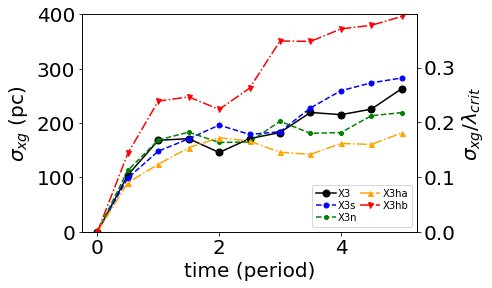

In [26]:
fig, ax1 = plt.subplots()
ax1.plot(tarr,stdarrx3,'k-o',label='X3',ms=7)
ax1.plot(tarr,stdarrx3_s,'b--o',label='X3s',ms=5)
ax1.plot(tarr,stdarrx3_n,'g--o',label='X3n',ms=4)
ax1.plot(tarr,stdarrx3_ha,'-.^',label='X3ha', color='orange',ms=5)
ax1.plot(tarr,stdarrx3_hb,'r-.v',label='X3hb',ms=5)
#ax1.plot(tarr,stdarrx3_hma,'-.v',label='X3hma',color='plum',ms=5)
#I checked and no differences!
#ax1.plot(tarr,stdarrx3_hmb,'-.v',label='X3hmb',color='orchid',ms=5)

ax1.set_xlabel('time (period)',fontsize=20)
ax1.set_ylabel(r'$\sigma_{xg}$ (pc)',fontsize=20)
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)
xgmax =400.
ax1.set_ylim(0,xgmax)
ax2 = ax1.twinx()

#ax2.plot(tarr,stdarrx1/lambda_crit, 'b.',ms=0.001)
ax2.set_ylabel(r"$\sigma_{xg}/\lambda_{crit}$",fontsize=20)
ax2.set_ylim(0,xgmax/lambda_crit)
ax1.legend(loc='lower right',labelspacing=0.2,handletextpad=0.18, ncol=2, columnspacing=0.3)
plt.savefig('sig_xg_comp.png')

mean, sig, sig/mean 10.0 2.40007999867 0.240007999867
vertical std height  147.03840564
mean, sig, sig/mean 10.0 2.2847809523 0.22847809523
vertical std height  146.077840695
mean, sig, sig/mean 10.0 2.41021824738 0.241021824738
vertical std height  145.064384343
mean, sig, sig/mean 10.0 2.3594440023 0.23594440023
vertical std height  143.655248914
mean, sig, sig/mean 10.0 2.96600472016 0.296600472016
vertical std height  138.196202544


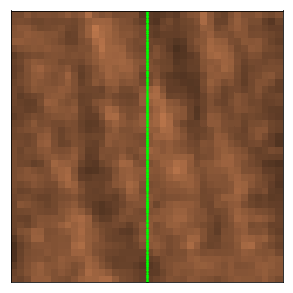

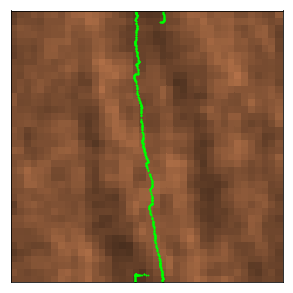

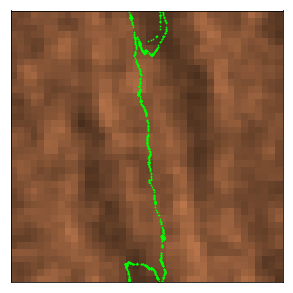

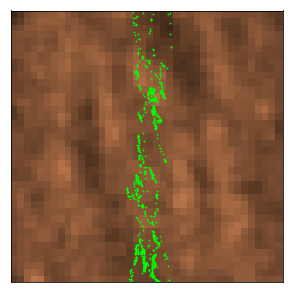

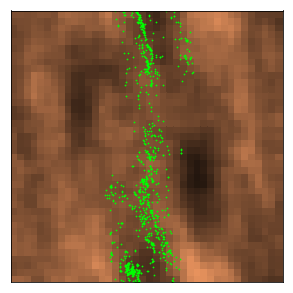

In [27]:
smax=25
fname = "../save_x2/ss0004.txt" 
pltdens_massless(fname,smax,"line_a.png",1); h = geth(fname)
fname = "../save_x2/ss0005.txt" 
pltdens_massless(fname,smax,"line_b.png",0); h = geth(fname)
fname = "../save_x2/ss0006.txt" 
pltdens_massless(fname,smax,"line_c.png",0); h = geth(fname)
fname = "../save_x2/ss0009.txt" 
pltdens_massless(fname,smax,"line_d.png",0); h = geth(fname)
fname = "../save_x2/ss0013.txt" 
pltdens_massless(fname,smax,"line_e.png",0); h = geth(fname)


In [28]:
root = "../save_x1/ss00"
sig_sig_x1, tarr = getstd_sig(root)
root = "../save_x2/ss00"
sig_sig_x2, tarr = getstd_sig(root)
root = "../save_x3/ss00"
sig_sig_x3, tarr = getstd_sig(root)
root = "../save_x4/ss00"
sig_sig_x4, tarr = getstd_sig(root)
root = "../save_x5/ss00"
sig_sig_x5, tarr = getstd_sig(root)
root = "../save_x3_ha/ss00"
sig_sig_x3_ha, tarr = getstd_sig(root)
root = "../save_x3_hb/ss00"
sig_sig_x3_hb, tarr = getstd_sig(root)

In [29]:
root = "../save_x3_s/ss00"
sig_sig_x3_s, tarr = getstd_sig(root)
root = "../save_x3_n/ss00"
sig_sig_x3_n, tarr = getstd_sig(root)


In [30]:
h_x1 = geth("../save_x1/ss0009.txt")/lambda_crit
h_x3_ha = geth("../save_x3_ha/ss0009.txt")/lambda_crit
h_x3_hb = geth("../save_x3_hb/ss0009.txt")/lambda_crit
print(h_x1,h_x3_ha,h_x3_hb)
# these are sigma_z/lambda_crit

vertical std height  143.676946727
vertical std height  295.052519275
vertical std height  70.5391141751
0.142678199331 0.293001508714 0.0700487727658


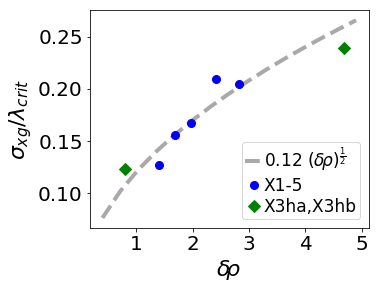

In [31]:
imid=2
shift=0
fig = plt.figure(figsize=(5, 4))
ax = fig.add_subplot(111)
#ax = fig.add_subplot(111, aspect='equal')
matplotlib.rc('xtick', labelsize=16) 
matplotlib.rc('ytick', labelsize=20)

xx = np.linspace(0.4,4.9,15)
yy = 0.08*xx**1
#ax.plot(xx,yy,'-.',color='cadetblue')
yy2 =  0.12*xx**0.5
ax.plot(xx,yy2,'--', color='darkgrey',linewidth=4,label=r'0.12 $(\delta\! \rho)^\frac{1}{2}$')



# normalized density contrast at t=imid/2 orbits
markersize=8
markersize2=6
r1 = sig_sig_x1[imid]/10.0/h_x1
ax.plot(r1,stdarrx1[imid+shift]/lambda_crit,'bo',ms=markersize, label ='X1-5')
r2 = sig_sig_x2[imid]/10.0/h_x1
ax.plot(r2,stdarrx2[imid+shift]/lambda_crit,'bo',ms=markersize)
r3= sig_sig_x3[imid]/10.0/h_x1
ax.plot(r3,stdarrx3[imid+shift]/lambda_crit,'bo',ms=markersize)
r4=sig_sig_x4[imid]/10.0/h_x1
ax.plot(r4,stdarrx4[imid+shift]/lambda_crit,'bo',ms=markersize)
r5=sig_sig_x5[imid]/10.0/h_x1
ax.plot(r5,stdarrx5[imid+shift]/lambda_crit,'bo',ms=markersize)
r3_ha= sig_sig_x3_ha[imid]/10.0/h_x3_ha
ax.plot(r3_ha,stdarrx3_ha[imid+shift]/lambda_crit,'gD',ms=markersize, label = 'X3ha,X3hb')
r3_hb=sig_sig_x3_hb[imid]/10.0/h_x3_hb
ax.plot(r3_hb,stdarrx3_hb[imid+shift]/lambda_crit,'gD',ms=markersize)

ax.set_ylabel(r'$\sigma_{xg}/\lambda_{crit}$',fontsize=22)
ax.set_xlabel(r'$\delta\! \rho$',fontsize=22)

ax.legend(loc='lower right',fontsize=17,labelspacing=0.2, handlelength=1,
          borderpad=0.2, handletextpad=0.1, scatterpoints=1, numpoints=1)

#ax.set_xlim(0.11,.24)
#ax.set_ylim(0.15,0.45)

plt.savefig('trend_rho.png') 

In [32]:
ip = 5
print(sig_sig_x1[imid]/10.0)
print(sig_sig_x2[imid]/10.0)
print(sig_sig_x3[imid]/10.0)
print(sig_sig_x4[imid]/10.0)
print(sig_sig_x5[imid]/10.0)
print(sig_sig_x3_s[imid]/10.0)
print(sig_sig_x3_n[imid]/10.0)
print(sig_sig_x3_ha[imid]/10.0)
print(sig_sig_x3_hb[imid]/10.0)


0.201113699185
0.241021824738
0.280221626574
0.343446997366
0.402454867035
0.26809908616
0.327789200554
0.235461079586
0.328845738911


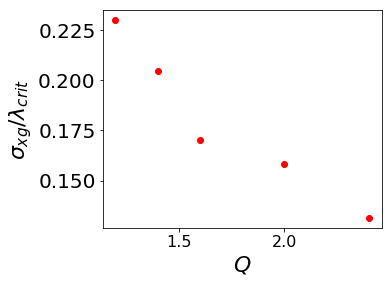

In [33]:
imid=3
shift=0
fig = plt.figure(figsize=(5, 4))
ax = fig.add_subplot(111)
#ax = fig.add_subplot(111, aspect='equal')
matplotlib.rc('xtick', labelsize=16) 
matplotlib.rc('ytick', labelsize=20)
ax.plot(2.4,stdarrx1[imid+shift]/lambda_crit,'ro')
ax.plot(2.0,stdarrx2[imid+shift]/lambda_crit,'ro')
ax.plot(1.6,stdarrx3[imid+shift]/lambda_crit,'ro')
ax.plot(1.4,stdarrx4[imid+shift]/lambda_crit,'ro')
ax.plot(1.2,stdarrx5[imid+shift]/lambda_crit,'ro')
#ax.plot(stdarrx3_ha[imid+shift]/lambda_crit,'go')
#ax.plot(stdarrx3_hb[imid+shift]/lambda_crit,'go')

ax.set_xlabel(r'$Q$',fontsize=22)
ax.set_ylabel(r'$\sigma_{xg}/\lambda_{crit}$',fontsize=22)


#ax.set_xlim(0.11,.24)
#ax.set_ylim(0.15,0.45)
xx = np.linspace(0.11,0.24,15)
yy = 1.74*xx**1
#ax.plot(xx,yy,'k--')
yy2 =  7*xx**2
#ax.plot(xx,yy2,'--', color='grey')
# not used

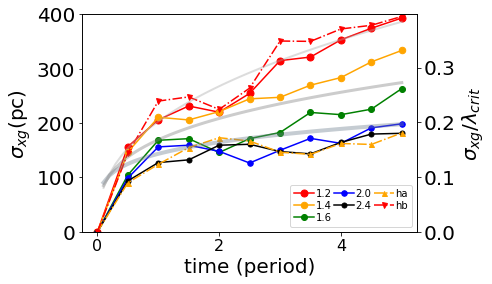

In [34]:
# grey lines on plot!
fig, ax1 = plt.subplots()
fac=1
ax2 = ax1.twinx()

def diffnew(tt,rr,power):
    return 0.12*rr**0.5*tt**power

tt = np.linspace(0.1,5.0,51)
d1 = diffnew(tt,r1,0.2)
ax2.plot(tt,d1,'-', color='slategray', linewidth=4, alpha=0.4)

d3 = diffnew(tt,r3,0.3)
ax2.plot(tt,d3,'-', color='gray', linewidth=3, alpha=0.4)

d5 = diffnew(tt,r5,0.4)
ax2.plot(tt,d5,'-', color='darkgray', linewidth=2, alpha=0.4)

xgmax =400.
ax1.set_ylim(0,xgmax)
ax2.set_ylim(0,xgmax/lambda_crit)

ax1.plot(tarr,stdarrx5,'r-o',label='1.2',ms=7)
ax1.plot(tarr,stdarrx4,'-o',label='1.4', color='orange',ms=6.5)
ax1.plot(tarr,stdarrx3,'g-o',label='1.6',ms=6)
ax1.plot(tarr,stdarrx2,'b-o',label='2.0',ms=5.5)
ax1.plot(tarr,stdarrx1,'k-o',label='2.4',ms=5)

ax1.plot(tarr,stdarrx3_ha,'-.^',label='ha', color='orange',ms=5)
ax1.plot(tarr,stdarrx3_hb,'r-.v',label='hb',ms=5)

ax1.set_xlabel('time (period)',fontsize=20)
ax2.set_ylabel(r'$\sigma_{xg}/\lambda_{crit}$ ',fontsize=20)
ax1.set_ylabel(r'$\sigma_{xg}$(pc) ',fontsize=20)
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)


ax1.legend(loc='lower right',labelspacing=0.2,handletextpad=0.18, ncol=3, columnspacing=0.2)
plt.savefig('sig_xg_model.png')

In [35]:
root = "../save_x1/ss00"
marrx1,tarr= getmax_xg(root)
root = "../save_x2/ss00"
marrx2,tarr= getmax_xg(root)
root = "../save_x3/ss00"
marrx3,tarr= getmax_xg(root)
root = "../save_x4/ss00"
marrx4,tarr= getmax_xg(root)
root = "../save_x5/ss00"
marrx5,tarr= getmax_xg(root)

In [36]:
root = "../save_x3_ha/ss00"
marrx3_ha,tarr= getmax_xg(root)
root = "../save_x3_hb/ss00"
marrx3_hb,tarr= getmax_xg(root)

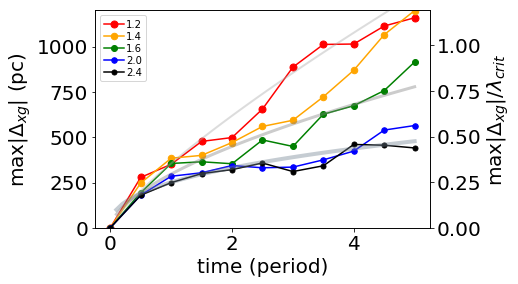

In [37]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

def diffnew_max(tt,rr,power):
    return 0.21*rr**0.5*tt**power

tt = np.linspace(0.1,5.0,51)
d1 = diffnew_max(tt,r1,0.4)
ax2.plot(tt,d1,'-', color='slategray', linewidth=4, alpha=0.4)

d3 = diffnew_max(tt,r3,0.6)
ax2.plot(tt,d3,'-', color='gray', linewidth=3, alpha=0.4)

d5 = diffnew_max(tt,r5,0.8)
ax2.plot(tt,d5,'-', color='darkgray', linewidth=2, alpha=0.4)

ax1.plot(tarr,marrx5,'r-o',label='1.2',ms=7)
ax1.plot(tarr,marrx4,'-o',label='1.4', color='orange',ms=6.5)
ax1.plot(tarr,marrx3,'g-o',label='1.6',ms=6)
ax1.plot(tarr,marrx2,'b-o',label='2.0',ms=5.5)
ax1.plot(tarr,marrx1,'k-o',label='2.4',ms=5)

ax1.set_xlabel('time (period)',fontsize=20)
ax1.set_ylabel(r'max$|\Delta_{xg}|$ (pc)',fontsize=20)
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)
xgmax =1200.
ax1.set_ylim(0,xgmax)

ax2.set_ylabel(r"max$|\Delta_{xg}|/\lambda_{crit}$",fontsize=20)
ax2.set_ylim(0,xgmax/lambda_crit)
ax1.legend(loc='upper left',labelspacing=0.2,handletextpad=0.2)
plt.savefig('max_xg.png')


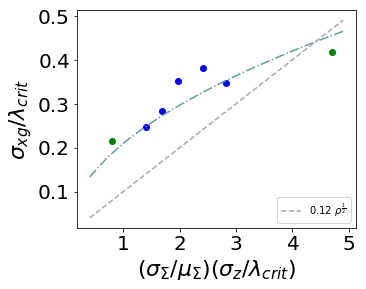

In [38]:
imid=2
shift=0
fig = plt.figure(figsize=(5, 4))
ax = fig.add_subplot(111)
#ax = fig.add_subplot(111, aspect='equal')
matplotlib.rc('xtick', labelsize=16) 
matplotlib.rc('ytick', labelsize=20)

# normalized density contrast at t=imid/2 orbits
ax.plot(r1,marrx1[imid+shift]/lambda_crit,'bo')
ax.plot(r2,marrx2[imid+shift]/lambda_crit,'bo')
ax.plot(r3,marrx3[imid+shift]/lambda_crit,'bo')
ax.plot(r4,marrx4[imid+shift]/lambda_crit,'bo')
ax.plot(r5,marrx5[imid+shift]/lambda_crit,'bo')
ax.plot(r3_ha,marrx3_ha[imid+shift]/lambda_crit,'go')
ax.plot(r3_hb,marrx3_hb[imid+shift]/lambda_crit,'go')

ax.set_ylabel(r'$\sigma_{xg}/\lambda_{crit}$',fontsize=22)
ax.set_xlabel(r'$(\sigma_\Sigma /\mu_\Sigma) (\sigma_z/\lambda_{crit} )$',fontsize=22)

#ax.set_xlim(0.11,.24)
#ax.set_ylim(0.15,0.45)
xx = np.linspace(0.4,4.9,15)
yy = 0.21*xx**0.5
ax.plot(xx,yy,'-.',color='cadetblue')
yy2 =  0.1*xx
ax.plot(xx,yy2,'--', color='darkgrey',label=r'0.12 $\rho^\frac{1}{2}$')
ax.legend(loc='lower right')



In [39]:
np.sin(30*np.pi/180)

0.49999999999999994

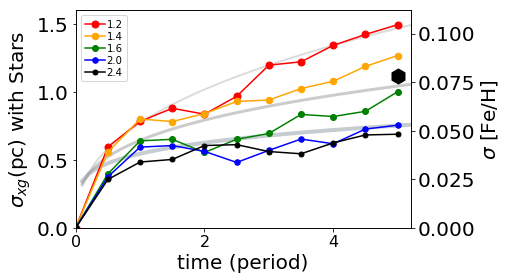

In [40]:
# grey lines  and cluster points on plot!
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

def diffnew(tt,rr,power):
    return 0.12*rr**0.5*tt**power

fac = 3.8/1e3
tt = np.linspace(0.1,5.2,51)
d1 = lambda_crit*diffnew(tt,r1,0.2)*fac
ax1.plot(tt,d1,'-', color='slategray', linewidth=4, alpha=0.4)

d3 = lambda_crit*diffnew(tt,r3,0.3)*fac
ax1.plot(tt,d3,'-', color='gray', linewidth=3, alpha=0.4)

d5 = lambda_crit*diffnew(tt,r5,0.4)*fac
ax1.plot(tt,d5,'-', color='darkgray', linewidth=2, alpha=0.4)

xgmax =1.6
ax1.set_ylim(0,xgmax)
ax1.set_xlim(0,max(tt))
ax2.set_ylim(0,xgmax*0.07)

ax1.plot(tarr,stdarrx5*fac,'r-o',label='1.2',ms=7)
ax1.plot(tarr,stdarrx4*fac,'-o',label='1.4', color='orange',ms=6.5)
ax1.plot(tarr,stdarrx3*fac,'g-o',label='1.6',ms=6)
ax1.plot(tarr,stdarrx2*fac,'b-o',label='2.0',ms=5.5)
ax1.plot(tarr,stdarrx1*fac,'k-o',label='2.4',ms=5)

#ax1.plot(tarr,stdarrx3_ha,'-.^',label='ha', color='orange',ms=5)
#ax1.plot(tarr,stdarrx3_hb,'r-.v',label='hb',ms=5)

ax1.set_xlabel('time (period)',fontsize=20)
ax2.set_ylabel(r'$\sigma$ [Fe/H]',fontsize=20)
ax1.set_ylabel(r'$\sigma_{xg}$(pc) with Stars',fontsize=20)
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)
ax2.plot(5.0,0.078,'hk', ms=15)

#ax1.legend(loc='lower right',labelspacing=0.2,handletextpad=0.18, ncol=3, columnspacing=0.2)
ax1.legend(loc='upper left',labelspacing=0.2,handletextpad=0.18,  columnspacing=0.2)
plt.savefig('sig_FeH.png')

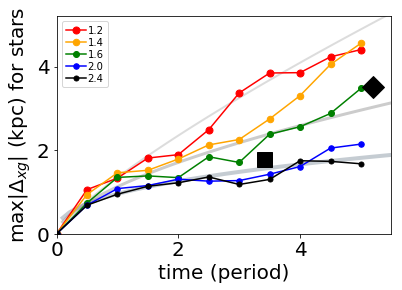

In [41]:
fig, ax1 = plt.subplots()
#ax2 = ax1.twinx()

def diffnew_max(tt,rr,power):
    return 0.21*rr**0.5*tt**power

tt = np.linspace(0.1,5.5,51)
d1 = lambda_crit*diffnew_max(tt,r1,0.4)*fac
ax1.plot(tt,d1,'-', color='slategray', linewidth=4, alpha=0.4)

d3 = lambda_crit*diffnew_max(tt,r3,0.6)*fac
ax1.plot(tt,d3,'-', color='gray', linewidth=3, alpha=0.4)

d5 = lambda_crit*diffnew_max(tt,r5,0.8)*fac
ax1.plot(tt,d5,'-', color='darkgray', linewidth=2, alpha=0.4)

fac = 3.8/1e3
ax1.plot(tarr,fac*marrx5,'r-o',label='1.2',ms=7)
ax1.plot(tarr,fac*marrx4,'-o',label='1.4', color='orange',ms=6.5)
ax1.plot(tarr,fac*marrx3,'g-o',label='1.6',ms=6)
ax1.plot(tarr,fac*marrx2,'b-o',label='2.0',ms=5.5)
ax1.plot(tarr,fac*marrx1,'k-o',label='2.4',ms=5)

ax1.set_xlabel('time (period)',fontsize=20)
ax1.set_ylabel(r'max$|\Delta_{xg}|$ (kpc) for stars',fontsize=20)
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)

ax1.set_ylim(0,5.2)

#ax2.set_ylabel(r'max$|\Delta_{xg}|$ (kpc) for stars',fontsize=20)
#ax2.set_ylim(0,xgmax*3.8)
ax1.set_xlim(0,max(tt))
ax1.legend(loc='upper left',labelspacing=0.2,handletextpad=0.2)

#ax2.plot(3.4,1.8, 'sk', ms=15, label='Prae')
#ax2.plot(5.2,3.5, 'Dk', ms=15, label='N')
ax1.plot(3.4,1.8, 'sk', ms=15, label='Prae')
ax1.plot(5.2,3.5, 'Dk', ms=15, label='N')
plt.savefig('max_oc.png')


(array([   8.,    8.,    1.,   12.,   42.,   46.,   52.,   66.,   83.,
          92.,  157.,  101.,   93.,  107.,   64.,   25.,   15.,   11.,
           9.,    8.]),
 array([-22.323  , -19.80955, -17.2961 , -14.78265, -12.2692 ,  -9.75575,
         -7.2423 ,  -4.72885,  -2.2154 ,   0.29805,   2.8115 ,   5.32495,
          7.8384 ,  10.35185,  12.8653 ,  15.37875,  17.8922 ,  20.40565,
         22.9191 ,  25.43255,  27.946  ]),
 <a list of 20 Patch objects>)

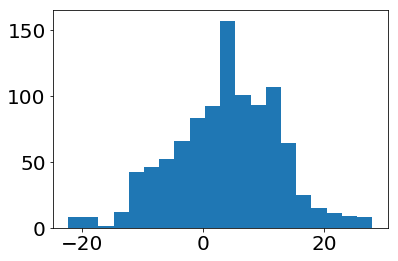

In [42]:
fname = "../save_x2/ss0010.txt" 
jj = np.loadtxt(fname,skiprows=9)
zarr= jj[0:nmassless,3] 
plt.hist(zarr, bins=20)
# looks pretty guassian or sech^2 like